In [2]:
import tensorflow as tf

In [7]:
from tensorflow.examples.tutorials.mnist import input_data

In [17]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x10d384438>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c20b52a20>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1c20b52358>)

In [18]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [19]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [20]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [13]:
mnist.validation.images.shape

(5000, 784)

In [21]:
import numpy as np
from matplotlib import pyplot as plt

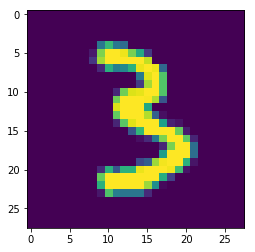

In [24]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [34]:
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval())

[[ 1.13322186  0.45387599 -1.82626998 ...,  2.03059793 -0.91097021
  -0.62730253]
 [-1.35407901 -0.04800731 -0.05031865 ..., -0.17762068  1.01906836
   0.82904285]
 [ 0.26951063  0.46058875 -2.12265921 ...,  0.18055628 -0.25939092
  -0.24231285]
 ..., 
 [-1.57803559  0.61281323  1.16583836 ..., -0.59082645 -0.54805982
  -1.01212168]
 [-0.33802646 -0.30995217 -0.46456161 ...,  1.11870122  1.02748537
   0.32503417]
 [-0.31240442 -0.2335557   0.26861891 ..., -2.71879625  1.07709408
  -3.01729894]]


In [4]:
tf.random_normal
#it requires a shape

<function tensorflow.python.ops.random_ops.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)>

In [6]:
tf.random_normal(1)
#it requires shape in square brackets thus this is also not the correct way to use this function

ValueError: Shape must be rank 1 but is rank 0 for 'random_normal_1/RandomStandardNormal' (op: 'RandomStandardNormal') with input shapes: [].

In [16]:
with tf.Session() as sess:
    a = tf.random_normal([784,256])

In [17]:
print(a)

Tensor("random_normal_11:0", shape=(784, 256), dtype=float32)


In [19]:
#we have to use eval() mehod for this random_normal to actually work
with tf.Session() as sess:
    print(tf.random_normal([784,256]).eval())

[[-1.1638322e+00  5.0887823e-01 -3.1805086e-01 ... -1.5094347e+00
  -3.0228251e-01  1.3716066e-02]
 [ 1.0697414e+00  8.7922770e-01  2.0826086e-01 ...  2.2818553e-01
   2.5626550e+00 -1.4427665e+00]
 [ 1.8600529e+00 -1.7102143e-02  6.2427747e-01 ... -4.3285003e-01
   2.7897315e-02  9.4470394e-01]
 ...
 [-4.8955539e-01 -5.2287763e-01 -1.5775207e+00 ...  6.1022842e-01
   7.1565025e-02  7.4266148e-01]
 [ 2.3894287e-03 -4.3057424e-01 -2.3359487e+00 ...  5.9385318e-01
   1.7032124e+00 -2.0555913e-01]
 [ 6.1294824e-01  7.6683718e-01  4.4937968e-02 ...  1.0263691e+00
  -6.4524883e-01 -4.4296494e-01]]


In [35]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}